<a href="https://colab.research.google.com/github/Sujan-Sawant/Aerofit_Case-study---Descriptive-Statistics-Probability/blob/main/Aerofit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case: Aerofit - Descriptive Statistics & Probability
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

# Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.
Dataset

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

- **Product Purchased**:	KP281, KP481, or KP781
- **Age**:	In years
- **Gender**:	Male/Female
- **Education**:	In years
- **MaritalStatus**:	Single or partnered
- **Usage**:	The average number of times the customer plans to use the treadmill each week.
- **Income**:	Annual income (in $)
- **Fitness**:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- **Miles**:	The average number of miles the customer expects to walk/run each week

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Downloding the data
! gdown 1H5AzViEurpexPyuFMC76pD-nASvbHzdX

Downloading...
From: https://drive.google.com/uc?id=1H5AzViEurpexPyuFMC76pD-nASvbHzdX
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 19.6MB/s]


In [ ]:
# Reading or Loading a CSV file into a pandas DataFrame.
df = pd.read_csv("aerofit_treadmill.csv")

In [ ]:
# Viewing the first few rows of a DataFrame.
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Viewing the last few rows of a DataFrame.
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [ ]:
# Retrieving the dimensions of a DataFrame (Rows, Columns).
df.shape


(180, 9)

In [ ]:
# Display the number of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
# Retrive the overview of a DataFrame's structure and content.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
# Retrieving the column labels (names) of a DataFrame .
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
# Display the data type of each column in a DataFrame
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

## Checking for Outliers

1) Age

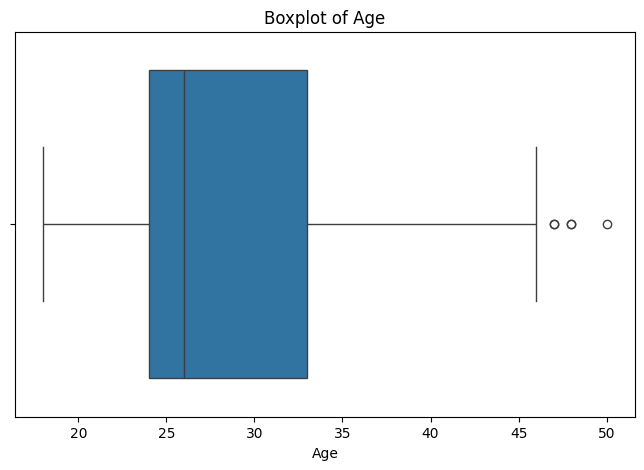

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Age"])
plt.title("Boxplot of Age")
plt.show()

## Detecting Outlier values using **Interquartile Range (IQR)** Method

In [ ]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Age"] < left_most) | (df["Age"] > right_most)]["Age"]

print("Outlier Ages:", set(outliers.tolist()))

Left boundary: 10.5
Right boundary: 46.5
Outlier Ages: {48, 50, 47}


## Cumulative Distribution Function (CDF)

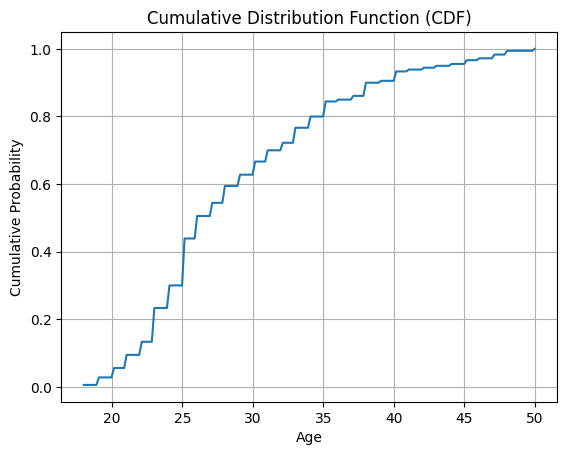

In [ ]:
min_age = df["Age"].min()
max_age = df["Age"].max()
total = len(df["Age"])

x_values = np.linspace(min_age,max_age,total)
y_values = []

for x in x_values:
  people_younger_than_x = df[df["Age"] <= x]
  num_of_people_younger_than_x = len(people_younger_than_x)
  fraction_of_people_younger_than_x = num_of_people_younger_than_x / total
  y_values.append(fraction_of_people_younger_than_x)

# Plotting Graph
plt.plot(x_values,y_values)
plt.xlabel("Age")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()



## 2) Education

### Checking for Outliers

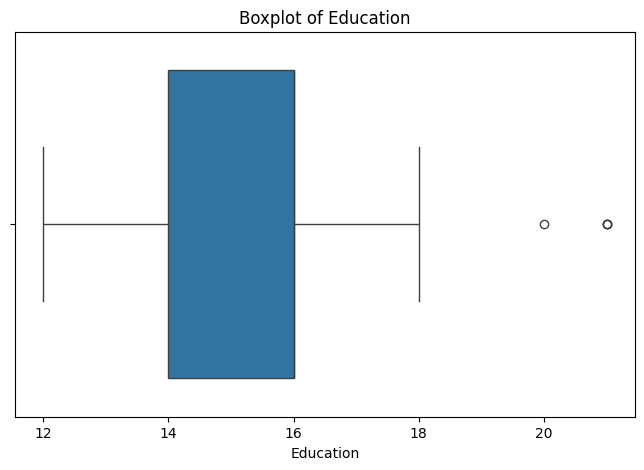

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Education"])
plt.title("Boxplot of Education")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["Education"].quantile(0.25)
Q3 = df["Education"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Education"] < left_most) | (df["Education"] > right_most)]["Education"]

print("Outlier Education:", set(outliers.tolist()))

Left boundary: 11.0
Right boundary: 19.0
Outlier Education: {20, 21}


## Cumulative Distribution Function (CDF)

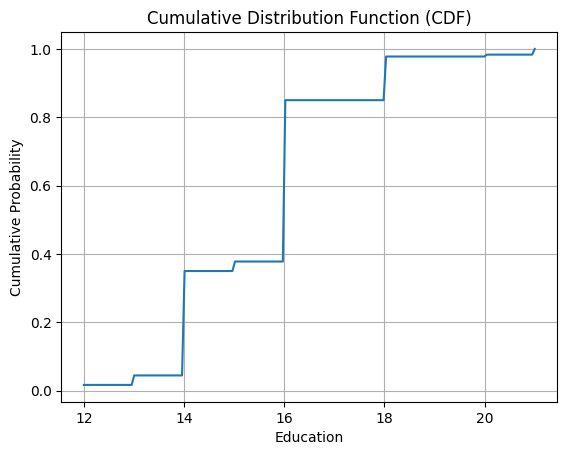

In [ ]:
min_education = df["Education"].min()
max_education = df["Education"].max()
total = len(df["Education"])

x_values = np.linspace(min_education,max_education,total)
y_values = []

for x in x_values:
  people_educated_than_x = df[df["Education"] <= x]
  num_of_people_educated_than_x = len(people_educated_than_x)
  fraction_of_people_educated_than_x = num_of_people_educated_than_x / total
  y_values.append(fraction_of_people_educated_than_x)

# Plotting Graph
plt.plot(x_values,y_values)
plt.xlabel("Education")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

## 3) Usage

### Checking for Outliers

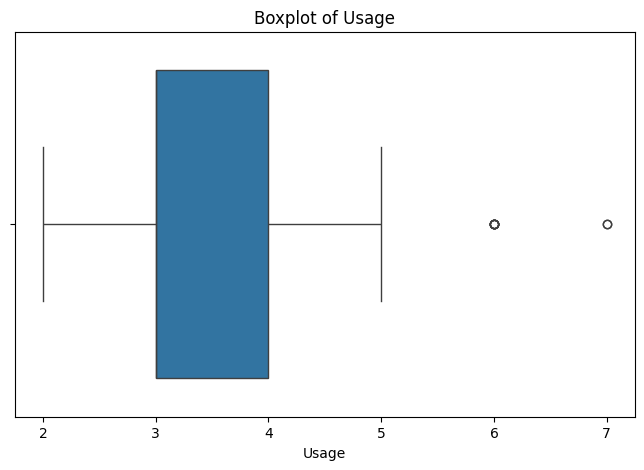

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Usage"])
plt.title("Boxplot of Usage")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["Usage"].quantile(0.25)
Q3 = df["Usage"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Usage"] < left_most) | (df["Usage"] > right_most)]["Usage"]

print("Outlier Usage:", set(outliers.tolist()))

Left boundary: 1.5
Right boundary: 5.5
Outlier Usage: {6, 7}


## Cumulative Distribution Function (CDF)

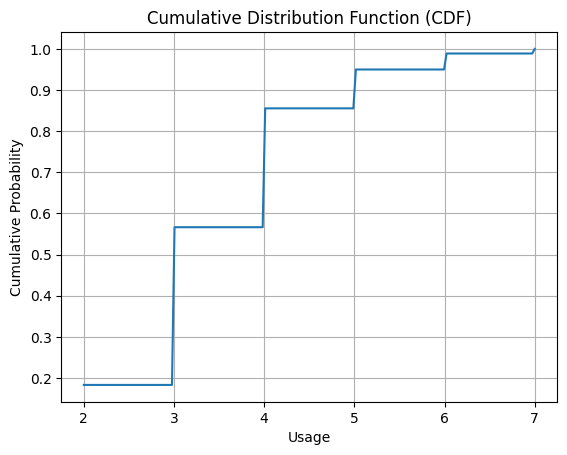

In [ ]:
min_usage = df["Usage"].min()
max_usage = df["Usage"].max()
total = len(df["Usage"])

x_values = np.linspace(min_usage,max_usage,total)
y_values = []

for x in x_values:
  people_used_trademill_than_x = df[df["Usage"] <= x]
  num_of_people_used_trademill_than_x = len(people_used_trademill_than_x)
  fraction_of_people_used_trademill_than_x = num_of_people_used_trademill_than_x / total
  y_values.append(fraction_of_people_used_trademill_than_x)

# Plotting Graph
plt.plot(x_values,y_values)
plt.xlabel("Usage")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

## 4) Fitness

### Checking for Outliers

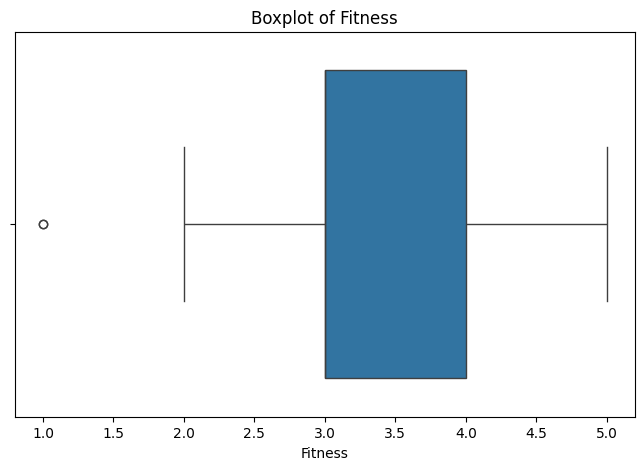

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Fitness"])
plt.title("Boxplot of Fitness")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["Fitness"].quantile(0.25)
Q3 = df["Fitness"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Fitness"] < left_most) | (df["Fitness"] > right_most)]["Fitness"]

print("Outlier Fitness:", set(outliers.tolist()))

Left boundary: 1.5
Right boundary: 5.5
Outlier Fitness: {1}


## Cumulative Distribution Function (CDF)

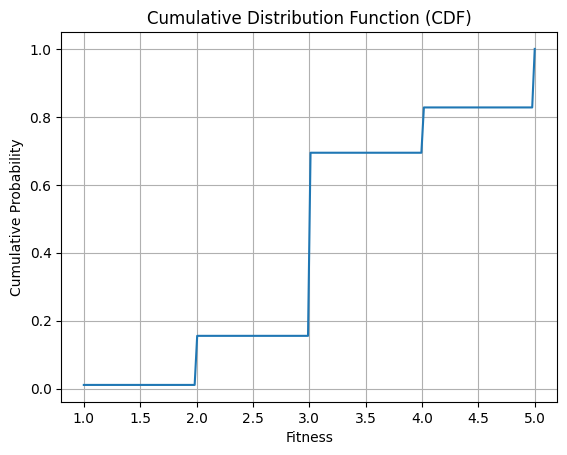

In [ ]:
min_fitness = df["Fitness"].min()
max_fitness = df["Fitness"].max()
total = len(df["Fitness"])

x_values = np.linspace(min_fitness,max_fitness,total)
y_values = []

for x in x_values:
  people_fitter_than_x = df[df["Fitness"] <= x]
  num_of_people_fitter_than_x = len(people_fitter_than_x)
  fraction_of_people_fitter_than_x = num_of_people_fitter_than_x / total
  y_values.append(fraction_of_people_fitter_than_x)

# Plotting Graph
plt.plot(x_values,y_values)
plt.xlabel("Fitness")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

## 5) Income

### Checking for Outliers

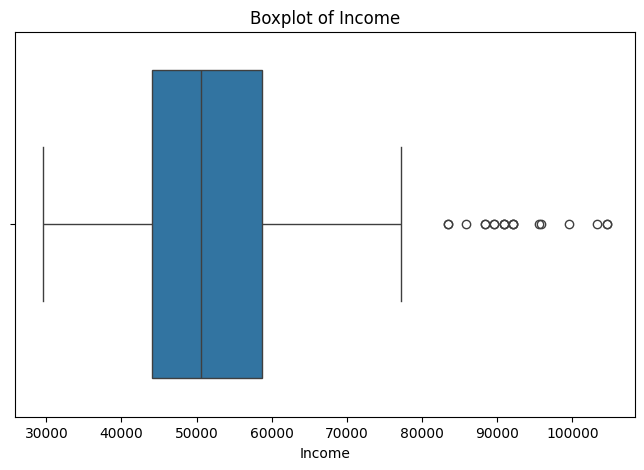

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Income"])
plt.title("Boxplot of Income")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Income"] < left_most) | (df["Income"] > right_most)]["Income"]

print("Outlier Income:", set(outliers.tolist()))

Left boundary: 22144.875
Right boundary: 80581.875
Outlier Income: {92131, 104581, 90886, 103336, 89641, 88396, 99601, 85906, 95508, 83416, 95866}


## Cumulative Distribution Function (CDF)

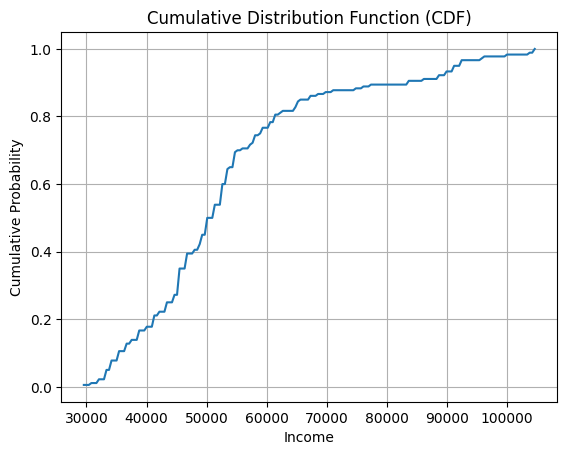

In [ ]:
min_income = df["Income"].min()
max_income = df["Income"].max()
total = len(df["Income"])

x_values = np.linspace(min_income,max_income,total)
y_values = []

for x in x_values:
  Income_of_people_less_than_x = df[df["Income"] <= x]
  num_of_people_less_income_than_x = len(Income_of_people_less_than_x)
  fraction_of_people_less_income_than_x = num_of_people_less_income_than_x / total
  y_values.append(fraction_of_people_less_income_than_x)

# Plotting Graph
plt.plot(x_values,y_values)
plt.xlabel("Income")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

## 6) Miles

### Checking for Outliers

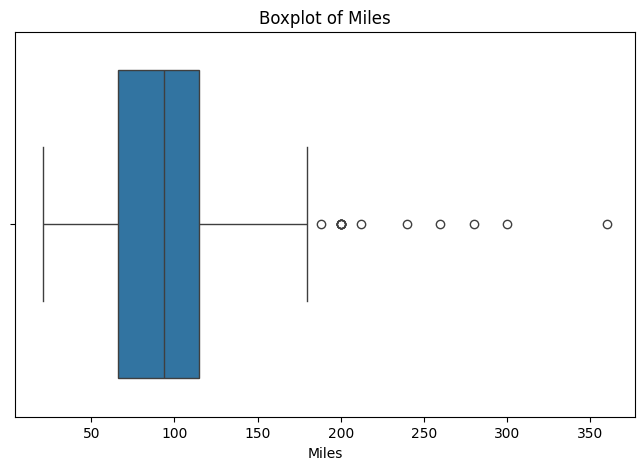

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x = df["Miles"])
plt.title("Boxplot of Miles")
plt.show()

## Detecting Outlier values using Interquartile Range (IQR) Method

In [ ]:
Q1 = df["Miles"].quantile(0.25)
Q3 = df["Miles"].quantile(0.75)
IQR = Q3 - Q1

# Set k = 1.5
k = 1.5
left_most = Q1 - k * IQR
right_most = Q3 + k * IQR

print("Left boundary:", left_most)
print("Right boundary:", right_most)


outliers = df[(df["Miles"] < left_most) | (df["Miles"] > right_most)]["Miles"]

print("Outlier Miles:", set(outliers.tolist()))

Left boundary: -7.125
Right boundary: 187.875
Outlier Miles: {260, 200, 360, 300, 240, 212, 280, 188}


## Cumulative Distribution Function (CDF)

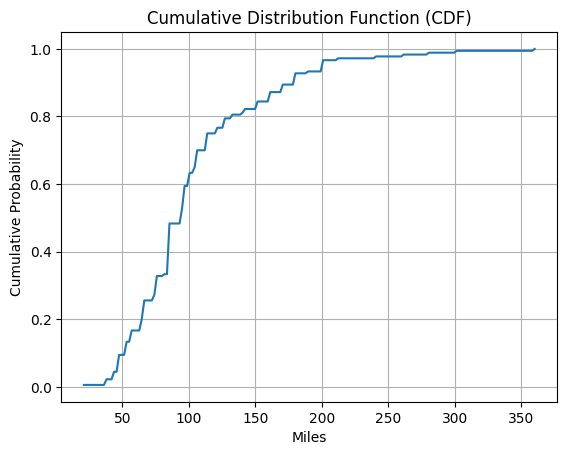

In [ ]:
min_miles = df["Miles"].min()
max_miles = df["Miles"].max()
total = len(df["Miles"])

x_values = np.linspace(min_miles,max_miles,total)
y_values = []

for x in x_values:
  people_less_miles_than_x = df[df["Miles"] <= x]
  num_of_people_less_miles_than_x = len(people_less_miles_than_x)
  fraction_of_people_less_miles_than_x = num_of_people_less_miles_than_x / total
  y_values.append(fraction_of_people_less_miles_than_x)

# Plotting Graph
plt.plot(x_values,y_values)
plt.xlabel("Miles")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.grid(True)
plt.show()

## Q1: What is distribution of customer ages?

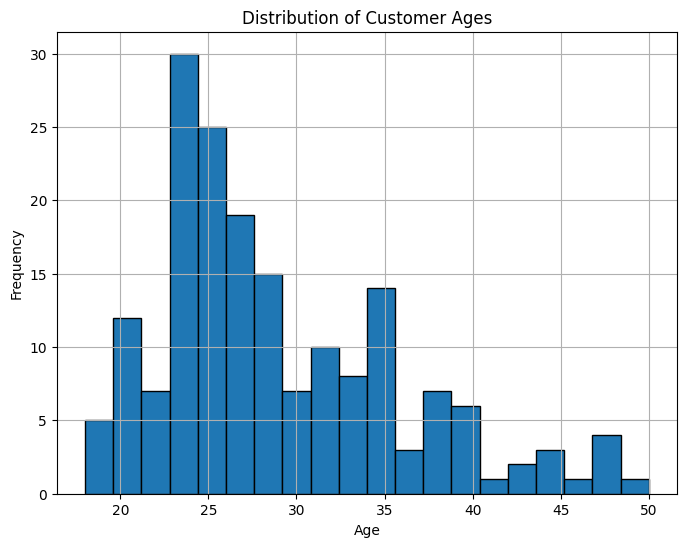

In [ ]:
import matplotlib.pyplot as plt

# Histogram of 'Age'
plt.figure(figsize=(8, 6))
plt.hist(df["Age"], bins=20, edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Ages")
plt.grid(True)
plt.show()

## Q2: What is distribution of Gender?

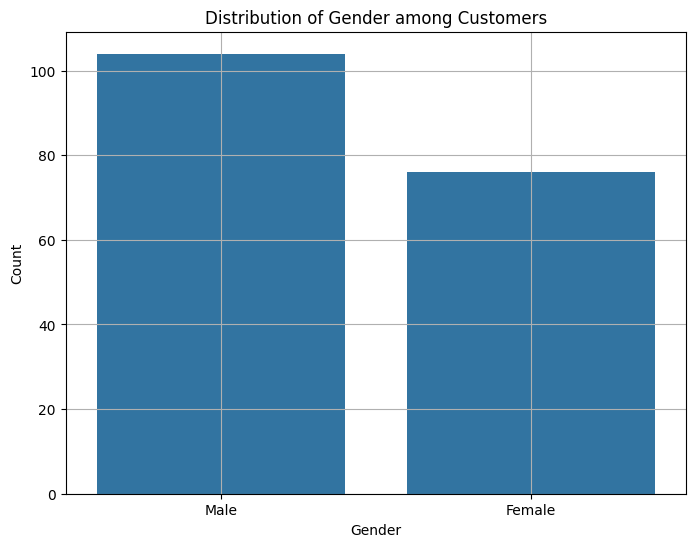

In [ ]:
import seaborn as sns

# Countplot of 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender among Customers")
plt.grid(True)
plt.show()

## Q3: What is distribution of age against diffrent products?

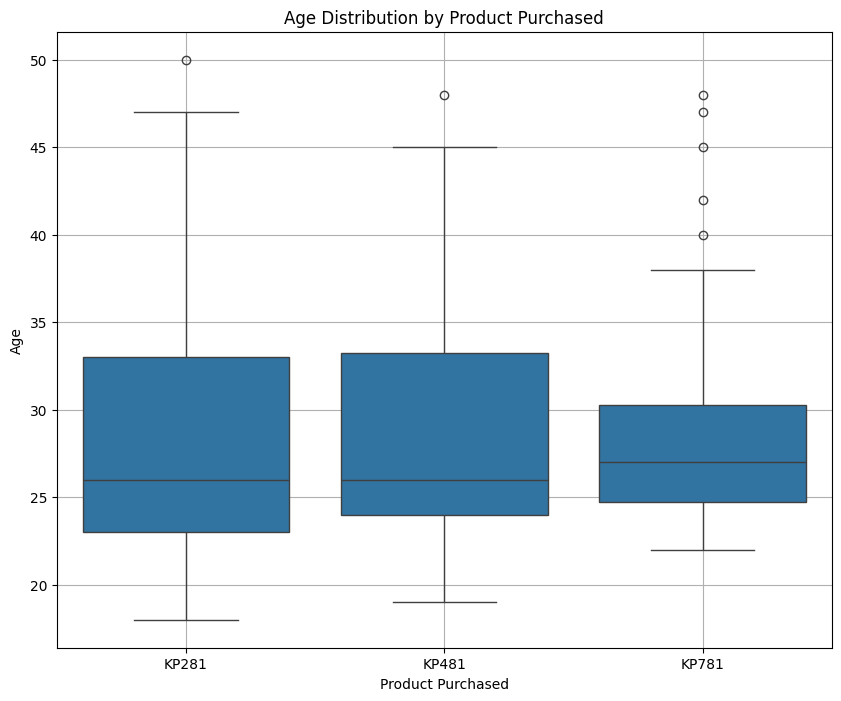

In [ ]:
# Boxplot of 'Age' vs. 'Product Purchased'
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Product", y="Age")
plt.xlabel("Product Purchased")
plt.ylabel("Age")
plt.title("Age Distribution by Product Purchased")
plt.grid(True)
plt.show()

## Q4: What is distribution of Income?

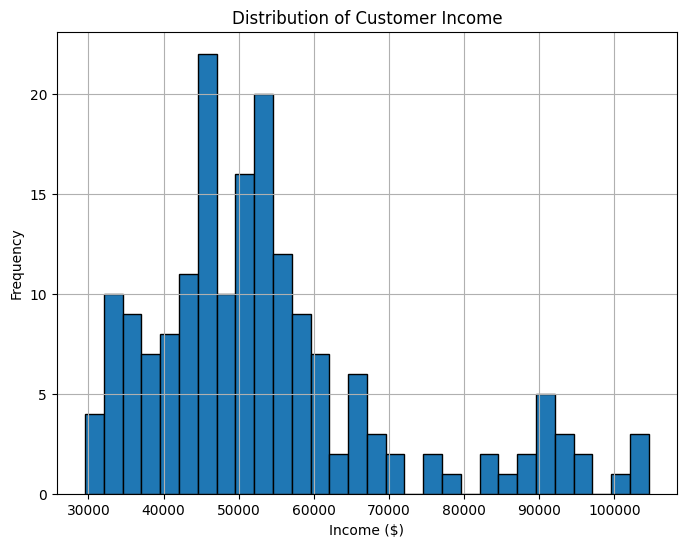

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df["Income"], bins=30,edgecolor = "black")
plt.xlabel("Income ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Customer Income")
plt.grid(True)
plt.show()

## Q5: How does the distribution of usage (times per week) differ across treadmill models?

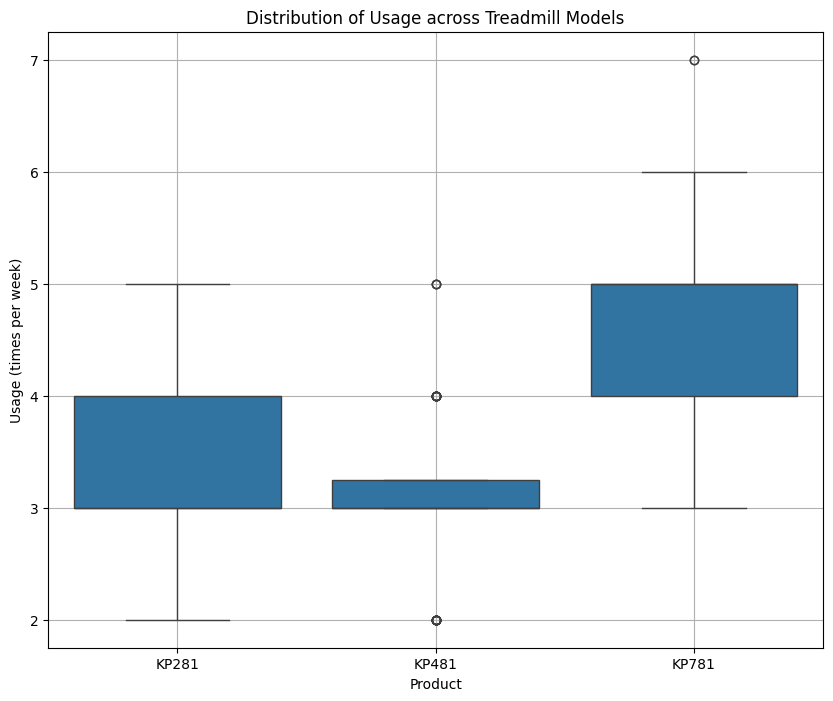

In [ ]:
# Boxplot of 'Usage' across 'Product Purchased'
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Product", y="Usage")
plt.xlabel("Product")
plt.ylabel("Usage (times per week)")
plt.title("Distribution of Usage across Treadmill Models")
plt.grid(True)
plt.show()

## Q6: Check corelation between diffrent columns

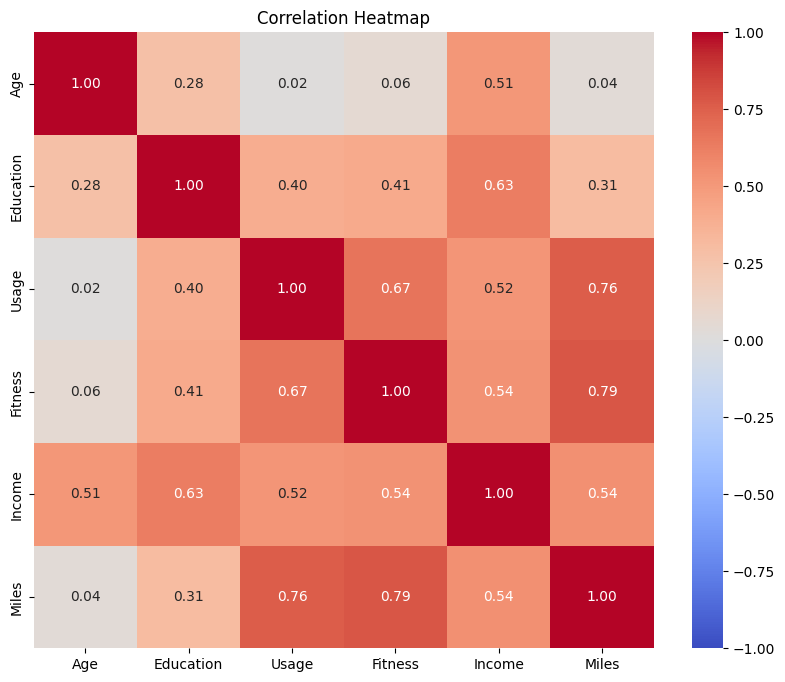

In [ ]:
df2 = df.select_dtypes(include="int64")
corr_matrix = df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt="0.2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

## Q7: What are the average age and income of customers who purchased each treadmill model?

In [ ]:
# Group by 'Product Purchased' and calculate mean age and income
average_stats = df.groupby('Product').agg({'Age': 'mean', 'Income': 'mean'})
print(average_stats)

           Age     Income
Product                  
KP281    28.55  46418.025
KP481    28.90  48973.650
KP781    29.10  75441.575


In [ ]:
# Count of customers by 'Product Purchased'
product_counts = df["Product"].value_counts()
print(product_counts)


Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64


In [ ]:
# Unique values of 'Gender' column
unique_genders = df["Gender"].unique()
print(unique_genders)


['Male' 'Female']


In [ ]:
# Count of customers by 'MaritalStatus'
marital_counts = df["MaritalStatus"].value_counts()
print(marital_counts)


MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


In [ ]:
# Distribution of 'Education' levels
education_counts = df["Education"].value_counts()
print(education_counts)


Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64


In [ ]:
# Count of customers by 'Fitness' rating
fitness_counts = df["Fitness"].value_counts()
fitness_counts


Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

## Q8: Check if features like marital status have any effect on the product purchased.

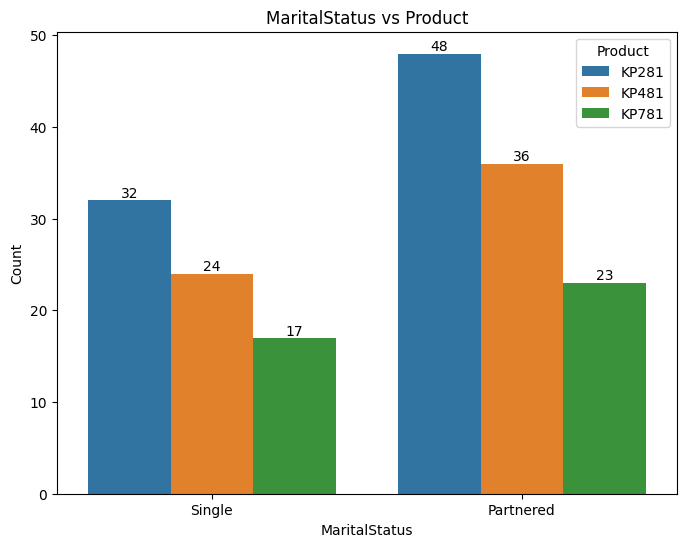

In [ ]:
plt.figure(figsize=(8, 6))
ax1 = sns.countplot(x="MaritalStatus", hue="Product", data=df)
for val in ax1.containers:
  ax1.bar_label(val)
plt.title("MaritalStatus vs Product")
plt.xlabel("MaritalStatus")
plt.ylabel("Count")
plt.show()

## Q9: Check if features like age have any effect on the product purchased (Product KP281)

###1) Product KP281

In [ ]:
bins =[18,22,26,30,34,38,42,46,50]

age_bins =pd.cut(df[df["Product"]=="KP281"]["Age"], bins)
pd.crosstab(columns = age_bins , index = df["Product"])


Age,"(18, 22]","(22, 26]","(26, 30]","(30, 34]","(34, 38]","(38, 42]","(42, 46]","(46, 50]"
Product,,,,,,,,
KP281,13,27,14,8,9,3,3,2


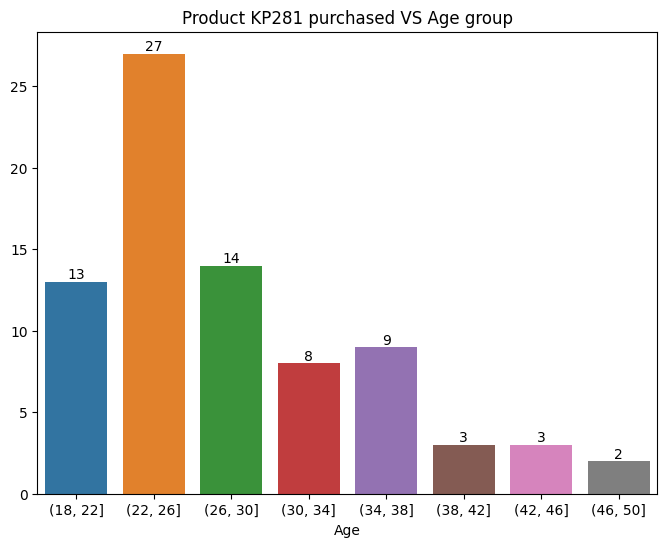

In [ ]:
plt.figure(figsize = (8,6))
ax1 = sns.barplot(pd.crosstab(columns = age_bins , index = df["Product"]))
for val in ax1.containers:
  ax1.bar_label(val)
plt.title("Product KP281 purchased VS Age group")
plt.show()

## Q10: Check if features like age have any effect on the product purchased (Product KP481)

###2) Product KP481

In [ ]:
bins =[18,22,26,30,34,38,42,46,50]

age_bins = pd.cut(df[df["Product"]=="KP481"]["Age"], bins)
pd.crosstab(columns = age_bins,index = df["Product"])

Age,"(18, 22]","(22, 26]","(26, 30]","(30, 34]","(34, 38]","(38, 42]","(42, 46]","(46, 50]"
Product,,,,,,,,
KP481,7,24,4,13,7,3,1,1


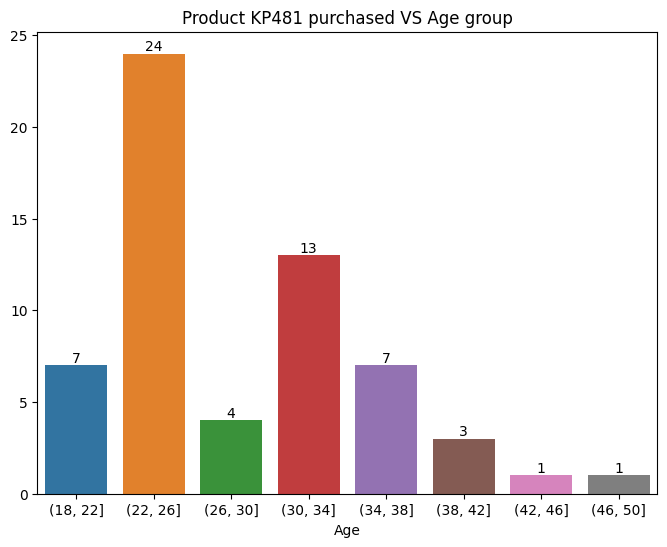

In [ ]:
plt.figure(figsize = (8,6))
ax2 = sns.barplot(pd.crosstab(columns = age_bins,index = df["Product"]))
for val in ax2.containers:
  ax2.bar_label(val)
plt.title("Product KP481 purchased VS Age group")
plt.show()

## Q11: Check if features like age have any effect on the product purchased (Product KP781).

###3) Product KP781

In [ ]:
bins =[18,22,26,30,34,38,42,46,50]

age_bins = pd.cut(df[df["Product"]=="KP781"]["Age"], bins)
pd.crosstab(columns = age_bins, index = df["Product"])

Age,"(18, 22]","(22, 26]","(26, 30]","(30, 34]","(34, 38]","(38, 42]","(42, 46]","(46, 50]"
Product,,,,,,,,
KP781,3,16,11,3,2,2,1,2


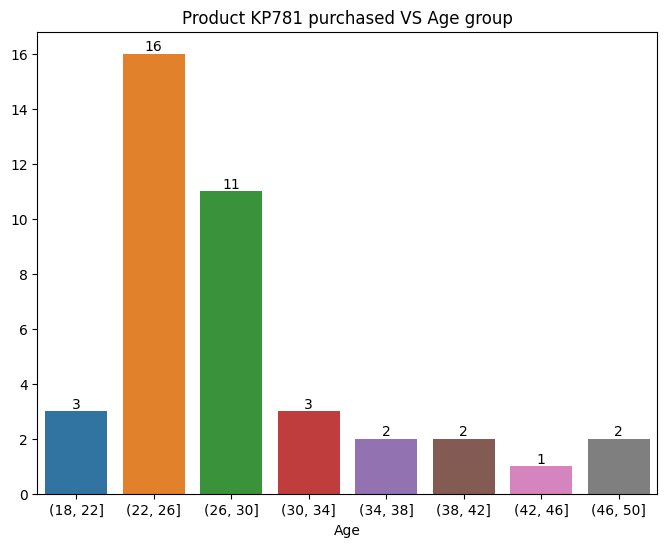

In [ ]:
plt.figure(figsize = (8,6))
ax3 = sns.barplot(pd.crosstab(columns = age_bins, index = df["Product"]))
for val in ax3.containers:
  ax3.bar_label(val)
plt.title("Product KP781 purchased VS Age group")
plt.show()

## Q12: what percent of customers have purchased product KP281, KP481, or KP781?

In [ ]:
df["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [ ]:
df["Product"].count()

180

In [ ]:
pd.crosstab(columns = df["Product"] , index = df["Gender"].count())

Product,KP281,KP481,KP781
row_0,,,
180,80,60,40


In [ ]:
data = {
    "Product" : ["KP281","KP481","KP781"],
    "Purchased" : [80,60,40]

}

df1 = pd.DataFrame(data)
df1.set_index("Product", inplace = True)

total_customers = df1["Purchased"].sum()

Percentage = (df1/total_customers) * 100
print("Percentage of customers for each product:\n",  Percentage)

Percentage of customers for each product:
          Purchased
Product           
KP281    44.444444
KP481    33.333333
KP781    22.222222


Based on the above data :

- Approximately 45% of customers chose to purchase the KP281 product.
- About 33% of customers opted for the KP481 product.
- Roughly 22% of customers selected the KP781 product.


In [ ]:
df["Gender"].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [ ]:
df[df["Product"]=="KP781"]["Gender"].value_counts()

Gender
Male      33
Female     7
Name: count, dtype: int64

In [ ]:
33/40 * 100

82.5

In [ ]:
pd.crosstab(columns = df["Product"], index = df["Gender"],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


## Q13. What is the probability of a male customer purchasing a KP281 treadmill?

In [ ]:
# Total number of male customers
total_male_customers = df[df["Gender"] == "Male"].shape[0]


# Number of male customers purchasing KP781
KP281_male_customers = df[(df["Gender"] == "Male") & (df["Product"] == "KP281")].shape[0]


# Probability calculation
probability_male_KP281 = (KP281_male_customers / total_male_customers) * 100
print(f"Probability of a male customer purchasing KP781: {probability_male_KP281:0.2f} %")


Probability of a male customer purchasing KP781: 38.46 %


## Q14: What is the probability of a female customer purchasing a KP281 treadmill?

In [ ]:
# Total number of female customers
total_female_customers = df[df["Gender"] == "Female"].shape[0]


# Number of female customers purchasing KP781
KP281_female_customers = df[(df["Gender"] == "Female") & (df["Product"] == "KP281")].shape[0]


# Probability calculation
probability_female_KP281 = (KP281_female_customers / total_female_customers) * 100
print(f"Probability of a male customer purchasing KP281: {probability_female_KP281:0.2f} %")

Probability of a male customer purchasing KP281: 52.63 %


## Q15: What is the probability of a male customer purchasing a KP781 treadmill?

In [ ]:
# Total number of male customers
total_male_customers = df[df["Gender"] == "Male"].shape[0]


# Number of male customers purchasing KP781kp71
kp781_male_customers = df[(df["Gender"] == "Male") & (df["Product"] == "KP781")].shape[0]


# Probability calculation
probability_male_kp781 = (kp781_male_customers / total_male_customers) * 100
print(f"Probability of a male customer purchasing KP781: {probability_male_kp781:0.2f} %")

Probability of a male customer purchasing KP781: 31.73 %


## Q16: What is the probability of a female customer purchasing a KP781 treadmill?

In [ ]:

# Total number of female customers
total_female_customers = df[df["Gender"] == "Female"].shape[0]


# Number of female customers purchasing KP781
kp781_female_customers = df[(df["Gender"] == "Female") & (df["Product"] == "KP781")].shape[0]


# Probability calculation
probability_female_kp781 = (kp781_female_customers / total_female_customers) * 100
print(f"Probability of a male customer purchasing KP781: {probability_female_kp781:0.2f} %")

Probability of a male customer purchasing KP781: 9.21 %


## Q17: What is the probability of a male customer purchasing a KP481 treadmill?

In [ ]:
# Total number of male customers
total_male_customers = df[df["Gender"] == "Male"].shape[0]


# Number of male customers purchasing KP481
KP481_male_customers = df[(df["Gender"] == "Male") & (df["Product"] == "KP481")].shape[0]


# Probability calculation
probability_male_KP481 = (KP481_male_customers / total_male_customers) * 100
print(f"Probability of a male customer purchasing KP481: {probability_male_KP481:0.2f} %")

Probability of a male customer purchasing KP481: 29.81 %


## Q18: What is the probability of a female customer purchasing a KP481 treadmill?

In [ ]:
# Total number of female customers
total_female_customers = df[df["Gender"] == "Female"].shape[0]


# Number of female customers purchasing KP481
KP481_female_customers = df[(df["Gender"] == "Female") & (df["Product"] == "KP481")].shape[0]


# Probability calculation
probability_female_KP481 = (KP481_female_customers / total_female_customers) * 100
print(f"Probability of a male customer purchasing KP481: {probability_female_KP481:0.2f} %")

Probability of a male customer purchasing KP481: 38.16 %


## Q19: What is the probability of a male and female customer purchasing a treadmill?

In [ ]:
total_customers = df["Product"].shape[0]
total_male_customers = df[df["Gender"]=="Male"]["Product"].shape[0]
total_female_customers = df[df["Gender"]=="Female"]["Product"].shape[0]

male = (total_male_customers/total_customers) * 100
female = (total_female_customers/total_customers) * 100

print(f"Overall percent of male customers: {male: 0.2f} %")
print(f"Overall percent of female customers: {female: 0.2f} %")

Overall percent of male customers:  57.78 %
Overall percent of female customers:  42.22 %


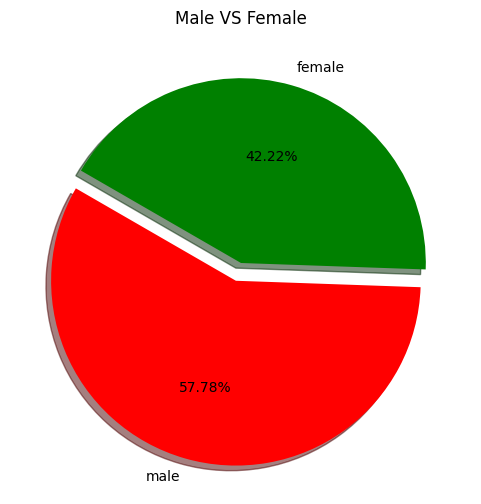

In [ ]:
val = [male,female]
labels = ("male","female")
explode = (0.1,0)
colors = ["red","green"]
plt.figure(figsize=(6,6))
plt.pie(val, explode = explode, labels = labels,
        colors = colors,autopct='%1.2f%%', shadow=True, startangle=150)
plt.title("Male VS Female")
plt.show()

## Q20: What is the conditional probability of a customer being partnered given that they purchased a KP481 treadmill?

In [ ]:
# Total number of customers who purchased KP481
total_kp481_customers = df[df["Product"]=="KP481"]["Product"].count()

# Number of partnered customers who purchased KP481
partnered_kp481_customers = df[(df["Product"]=="KP481") & (df["MaritalStatus"]=="Partnered")]["MaritalStatus"].count()

# Conditional probability calculation
conditional_probability_partnered_given_kp481 = (partnered_kp481_customers / total_kp481_customers) * 100
print(f"Conditional probability of being partnered given KP481: {conditional_probability_partnered_given_kp481:0.2f} %")

Conditional probability of being partnered given KP481: 60.00 %


## Q21: What is the probability that a customer plans to use the treadmill more than 3 times per week given that they rate their fitness as 4 or 5?

In [ ]:
# Calculate P(Usage > 3 | Fitness >= 4)
total_high_fitness = len(df[df["Fitness"] >= 4])
high_usage_given_high_fitness = len(df[(df["Fitness"] >= 4) & (df["Usage"] > 3)]) / total_high_fitness
print(f"P(Usage > 3 | Fitness >= 4) = {high_usage_given_high_fitness}")


P(Usage > 3 | Fitness >= 4) = 0.8


## Q22: What is the joint probability that a customer is Female and has 16 years of education?

In [ ]:
# Calculate P(Gender = Female and Education = 16)
total_customers = len(df)
female_and_education_16 = len(df[(df["Gender"] == "Female") & (df["Education"] == 16)]) / total_customers
print(f"P(Gender = Female and Education = 16) = {female_and_education_16: 0.2f}")


P(Gender = Female and Education = 16) =  0.19


## Q23: What is the probability that a customer expects to walk/run more than 100 miles per week given that they are aged between 20 and 30 years?

In [ ]:
# Calculate P(Miles > 100 | 20 <= Age <= 30)
total_age_20_30 = len(df[(df["Age"] >= 20) & (df["Age"] <= 30)])
high_miles_given_age_20_30 = len(df[(df["Age"] >= 20) & (df["Age"] <= 30) & (df["Miles"] > 100)]) / total_age_20_30
print(f"P(Miles > 100 | 20 <= Age <= 30) = {high_miles_given_age_20_30 : 0.2f}")


P(Miles > 100 | 20 <= Age <= 30) =  0.42


## Q24: What is the probability that a customer has an income greater than $40,000 given that they have 18 years of education?

In [ ]:
# Calculate P(Income > 40000 | Education = 18)
total_education_18 = len(df[df["Education"] == 18])
high_income_given_education_18 = len(df[(df["Education"] == 18) & (df["Income"] > 40000)]) / total_education_18
print(f"P(Income > 40000 | Education = 18) = {high_income_given_education_18}")


P(Income > 40000 | Education = 18) = 1.0


## Q25: What is the joint probability that a customer is Male and aged between 25 and 35 years?

In [ ]:
# Calculate P(Gender = Male and 25 <= Age <= 35)
total_customers = len(df)
male_and_age_25_35 = len(df[(df["Gender"] == "Male") & (df["Age"] >= 25) & (df["Age"] <= 35)]) / total_customers
print(f"P(Gender = Male and 25 <= Age <= 35) = {male_and_age_25_35: 0.2f}")


P(Gender = Male and 25 <= Age <= 35) =  0.29


## Q26: What is the probability that a customer rates their fitness as 3 given that they use the treadmill more than 3 times per week?

In [ ]:
# Calculate P(Fitness = 3 | Usage > 3)
total_high_usage = len(df[df["Usage"] > 3])
fitness_3_given_high_usage = len(df[(df["Usage"] > 3) & (df["Fitness"] == 3)]) / total_high_usage
print(f"P(Fitness = 3 | Usage > 3) = {fitness_3_given_high_usage : 0.2f}")


P(Fitness = 3 | Usage > 3) =  0.41


## Q27: What is the probability that a customer has 12 years of education given that they are Single?

In [ ]:
# Calculate P(Education = 12 | MaritalStatus = Single)
total_single = len(df[df["MaritalStatus"] == "Single"])
education_12_given_single = len(df[(df["MaritalStatus"] == "Single") & (df["Education"] == 12)]) / total_single
print(f"P(Education = 12 | MaritalStatus = Single) = {education_12_given_single : 0.4f}")


P(Education = 12 | MaritalStatus = Single) =  0.0274


## Q28: What is the probability that a customer plans to use the treadmill 3 or more times per week given that their income is between 30,000 and 50,000?

In [ ]:
# Calculate P(Usage >= 3 | 30000 <= Income <= 50000)
total_income_30k_50k = len(df[(df["Income"] >= 30000) & (df["Income"] <= 50000)])
high_usage_given_income_30k_50k = len(df[(df["Income"] >= 30000) & (df["Income"] <= 50000) & (df["Usage"] >= 3)]) / total_income_30k_50k
print(f"P(Usage >= 3 | 30000 <= Income <= 50000) = {high_usage_given_income_30k_50k : 0.2f}")


P(Usage >= 3 | 30000 <= Income <= 50000) =  0.78


## Q29: What is the probability that a customer rates their fitness as 4 or 5 given that they are Female?

In [ ]:
# Calculate P(Fitness >= 4 | Gender = Female)
total_female = len(df[df["Gender"] == "Female"])
high_fitness_given_female = len(df[(df["Gender"] == "Female") & (df["Fitness"] >= 4)]) / total_female
print(f"P(Fitness >= 4 | Gender = Female) = {high_fitness_given_female : 0.4f}")


P(Fitness >= 4 | Gender = Female) =  0.1842


## Q30: What is the joint probability that a customer is Single and has an income greater than $40,000?

In [ ]:
# Calculate P(MaritalStatus = Single and Income > 40000)
total_customers = len(df)
single_and_high_income = len(df[(df["MaritalStatus"] == "Single") & (df["Income"] > 40000)]) / total_customers
print(f"P(MaritalStatus = Single and Income > 40000) = {single_and_high_income : 0.4f}")


P(MaritalStatus = Single and Income > 40000) =  0.3222


## Q31: What is the probability that a customer expects to walk/run more than 75 miles per week given that they have 14 years of education?

In [ ]:
# Calculate P(Miles > 75 | Education = 14)
total_education_14 = len(df[df["Education"] == 14])
high_miles_given_education_14 = len(df[(df["Education"] == 14) & (df["Miles"] > 75)]) / total_education_14
print(f"P(Miles > 75 | Education = 14) = {high_miles_given_education_14 : 0.4f}")


P(Miles > 75 | Education = 14) =  0.5636


## Q32: What is the probability that a customer plans to use the treadmill 3 or more times per week given that they rate their fitness as 2?

In [ ]:
# Calculate P(Usage >= 3 | Fitness = 2)
total_fitness_2 = len(df[df["Fitness"] == 2])
high_usage_given_fitness_2 = len(df[(df["Fitness"] == 2) & (df["Usage"] >= 3)]) / total_fitness_2
print(f"P(Usage >= 3 | Fitness = 2) = {high_usage_given_fitness_2 : 0.4f}")


P(Usage >= 3 | Fitness = 2) =  0.4615


## Q33: What is the probability that a customer plans to use the treadmill 3 or more time per week given that they rate their fitness as 3?

In [ ]:
# Calculate P(Usage >= 3 | Fitness = 3)
total_fitness_3 = len(df[df["Fitness"]==3])
high_usage_given_fitness_3 =len(df[(df["Fitness"] ==3) & (df["Usage"] >=3)]) / total_fitness_3
print(f"P(Usage >= 3 | Fitness = 3) = {high_usage_given_fitness_3 : 0.4f}")

P(Usage >= 3 | Fitness = 3) =  0.8144


## Q34: What is the probability that a customer is Female given that they are partnered (MaritalStatus = Partnered)?

In [ ]:
# Calculate P(Gender = Female | MaritalStatus = Partnered)
total_partnered = len(df[df["MaritalStatus"] == "Partnered"])
female_given_partnered = len(df[(df["MaritalStatus"] == "Partnered") & (df["Gender"] == "Female")]) / total_partnered
print(f"P(Gender = Female | MaritalStatus = Partnered) = {female_given_partnered : 0.4f}")


P(Gender = Female | MaritalStatus = Partnered) =  0.4299


# Q35: Construct a table for 'Product Purchased' vs. 'Gender' and compute marginal probabilities.

In [ ]:
# Create contingency table
table = pd.crosstab(df["Product"], df["Gender"], margins = True)

# Compute marginal probabilities
marginal_probabilities = table / df["Product"].shape[0]
print("Table:")
print(table)
print("\nMarginal Probabilities:")
print(marginal_probabilities)


Table:
Gender   Female  Male  All
Product                   
KP281        40    40   80
KP481        29    31   60
KP781         7    33   40
All          76   104  180

Marginal Probabilities:
Gender     Female      Male       All
Product                              
KP281    0.222222  0.222222  0.444444
KP481    0.161111  0.172222  0.333333
KP781    0.038889  0.183333  0.222222
All      0.422222  0.577778  1.000000


## Insights AND Recommendations

1. Age Influence on Product Choice:

  *   Customers who are between age group (22-26) and (26-30) purchased KP781 and KP281 models. Focus marketing efforts on this age group, especially for promoting KP781 and KP281.
  *   Customers who are between age group (22-26) and (30-34) purchased KP481  models. Focus marketing efforts on this age group, especially for promoting KP481.


2. Marital Status and Product Preference:
  *   Products KP281 and KP481 show more purchases from partnered customers, whereas KP781 has a balanced distribution.
  *   Same with single category individuals they also have more inclined towards product like KP281 and KP481.
  
  *   Consider tailoring marketing messages to highlight family-friendly features for partnered customers.


3. Gender Preferences in Product Purchase:
  *   There's an even split in product purchases between genders across for KP281 and KP481 models.
  *   Whreas KP781 Product has significance diffrence as there are 33 Male and only 7 Female customers purchase.
  *   Implement gender-specific promotions or incentives to enhance customer engagement and satisfaction.

4. Overall Product Popularity and Market Share:
  *   KP281 is the most popular model, accounting for about 45% of purchases,followed by KP481 (33%) and KP781 (22%).

  *   Allocate resources proportionally to maintain KP281's market dominance Have more inventory for products like KP281 and KP481
  *   Get feedback from customers for the product KP781, and make changes accordingly and introduce the product again in the market with changes,also run some discounts,campaigns to bring customers towards KP781 product.


5.	Educational and Income Considerations:
  *   Customers with higher education (e.g., 16 years) tend to be more engaged,particularly when combined with higher incomes.
  *   Develop premium services or loyalty programs tailored to this demographic.

6. Fitness and Usage Behavior:
  *   Customers who rate their fitness as 4 or 5 are more likely to use the treadmill frequently (more than 3 times per week).
  *   Offer specialized fitness programs or incentives for these active users to increase usage and satisfaction.











## Conclusion:
These insights provide a comprehensive view of customer demographics, preferences, and behaviors related to treadmill purchases. By leveraging these insights, businesses can optimize their marketing strategies, product offerings, and customer retention efforts to drive growth and improve customer satisfaction.